<a href="https://colab.research.google.com/github/avigangarde/Capstone-II--Yes-bank-stock-close-price-prediction-Supervised-ML-Regression-/blob/main/Copy_of_Capstone_Project_2_Yes_Bank_Stock_Closing_Price_Prediction_RANJIT_BISWAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project 2 - Yes Bank Stock Closing Price Prediction**
(Supervised - Regression)

**Project by:-Ranjit Biswal**

**Data Science Trainee at AlmaBetter**

**Problem Statement**


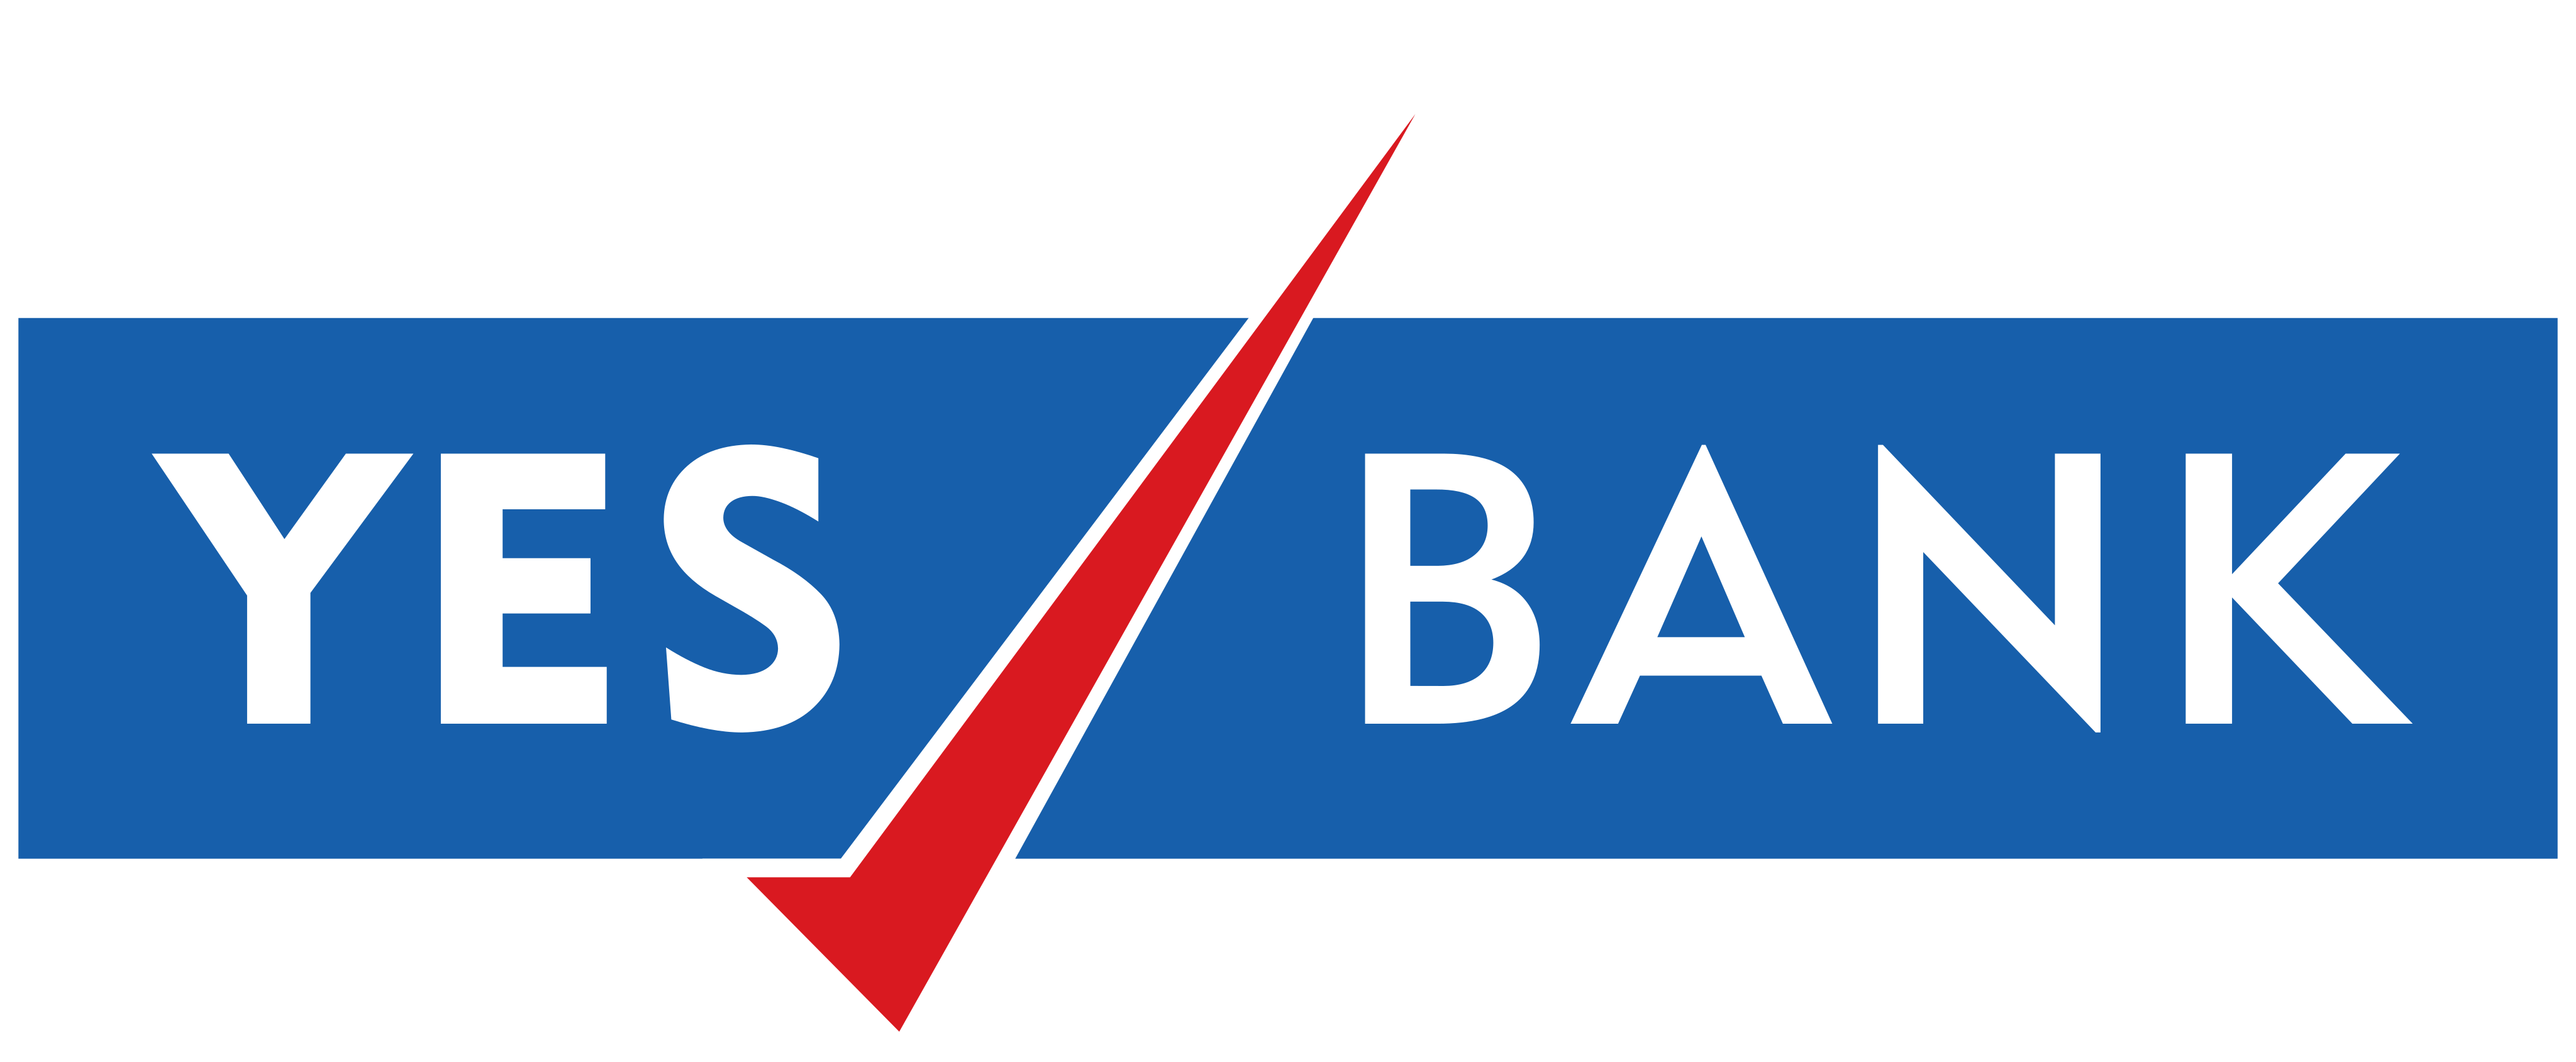

# <b> <u>Problem Statement</u></b>



## Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

##**What is stock?**

A Stock or share (also known as a company’s “equity”) is a financial instrument that represents ownership in a company.

Since, we've the **YES BANK** Stock price dataset which has the monthly stock prices of the bank since its inception. 
It contains the following features:

* **Date:** It denotes date of investment done (in our case we have month and year).
* **Open:** Open means the price at which a stock started trading when the opening bell rang.
* **High:**  High refer to the maximum prices in a given time period.
* **Low:**  Low refer to the minimum prices in a given time period.
* **Close:** Close refers to the price of an individual stock when the stock exchange closed for the day.

**First, we import required libraries:**

In [ ]:
#Importing libraries for data handelling
import pandas as pd
import numpy as np
from numpy import math
from xgboost import XGBRegressor

#Importing libraries for Data Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Machine Learning Libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error

# Remove Warnings.
import warnings
warnings.filterwarnings('ignore')


# **Reading the data**

The Dataset has Opening, Highest, Lowest and the Closing Prices of the Stock in every month. For this analysis,we select only Closing Stock Prices.

In [ ]:
#Connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/assignment5/data_YesBank_StockPrices.csv')

In [ ]:
# print first 5 rows of the dataset
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


#**Data Preprocessing**

In [ ]:
#Take a look at data
#first 5 rows
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
#last 5 rows
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


--Data available from Jul 2005 to Nov 2020.

In [ ]:
#shape of data
df.shape

(185, 5)

In [ ]:
#Details of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


-- Will need to change data type of date to datetime.

In [ ]:
# Summary of the Categorical features
df.describe(include='object')

,Date
count,185
unique,185
top,Jul-05
freq,1


# **Visualization of Yes Bank Stock**

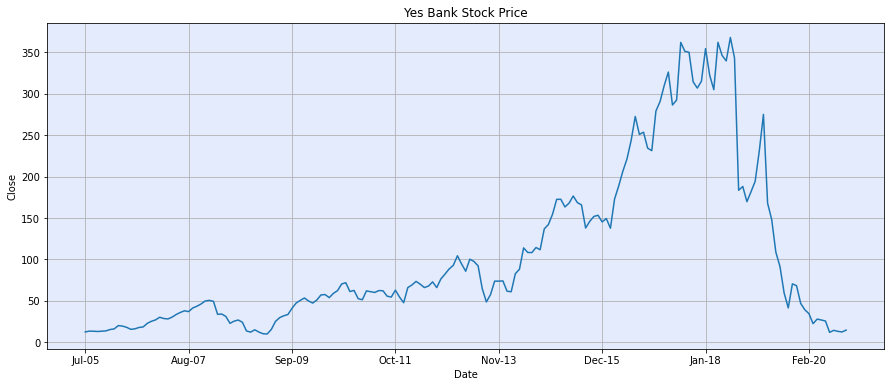

In [ ]:
# Visualize the Closing Price
plt.figure(figsize=(15,6))
ax = df[['Date','Close']]
ax = ax.set_index('Date')
ax['Close'].plot()
plt.axes().set_facecolor("#e3ebfc")
plt.title('Yes Bank Stock Price')
plt.ylabel('Close')
plt.grid()
plt.show()

In [ ]:
#Summarry of dataset
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


**Missing Values:-**

In [ ]:
#Looking for missing values
df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

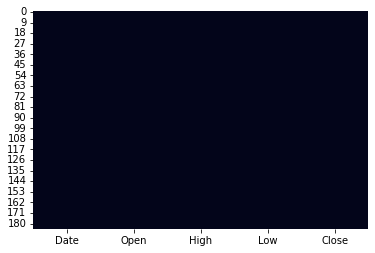

In [ ]:
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

-- No missing values in dataset.

**Duplicate Rows:-**

In [ ]:
#Looking for duplicates in dataset
len(df[df.duplicated()])

0

**Feature enginearing on Date:-**

In [ ]:
#importing datetime
from datetime import datetime
#parsing date which is string of format %b-%y to datetime (%b is for Jul i.e month short form and %y is for year in two digit)
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [ ]:
#lets look at dataset after date format change
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


-- Yes!! Format and data type of date feature changed into datetime.

**Data preprocessing finished.**
Dataset is clean and ready for exploratory data analysis.

#**Exploratory Data Analysis**

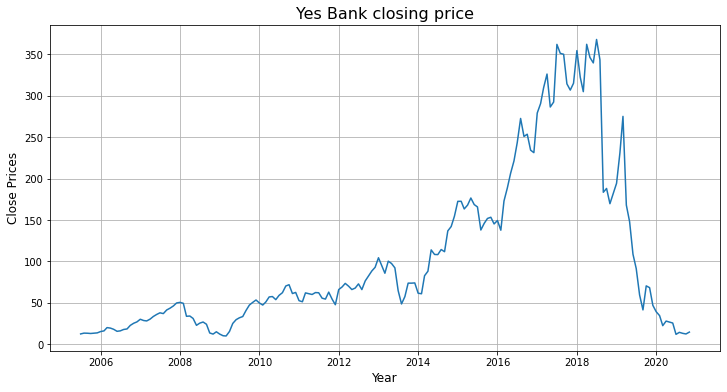

In [ ]:
#plotting close price vs date
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Close Prices', fontsize=12)
plt.plot(df['Date'], df['Close'])
plt.title('Yes Bank closing price', fontsize=16)
plt.show()

As we can see here the stock close price decreased after year 2018 the probably because of Rana Kapoor case and hitted the stock price heavily.

**Lets visualize close, open, low and high in combined line plot.**

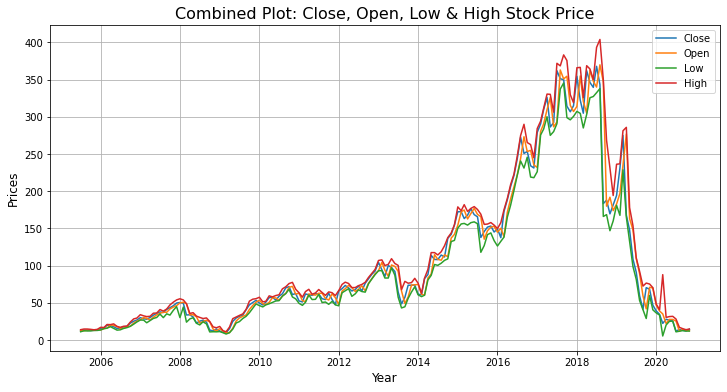

In [ ]:
# Combined Line Plot for all features with respect to date.
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'])
plt.plot(df['Date'], df['Open'])
plt.plot(df['Date'], df['Low'])
plt.plot(df['Date'], df['High'])
plt.legend(['Close','Open','Low','High'])
plt.title('Combined Plot: Close, Open, Low & High Stock Price', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Prices', fontsize=12)
plt.grid()

--All the prices shows almost similar trends with each other. 

-- Which means that this features may be strongly correlated with each other.

##**Distribution of dependant variable i.e Close Price of stock.**

In [ ]:
#make a list of independant numerical variables
numerical_features = list(set(df.describe().columns) - {'Close'})
numerical_features

['Low', 'High', 'Open']

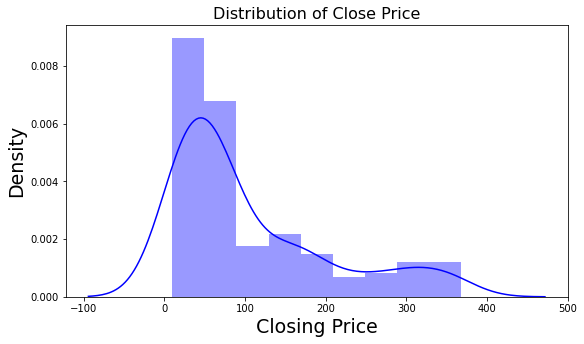

In [ ]:
#distribution plot of Close price to look for normal distribution
plt.figure(figsize=(9,5))
sns.distplot(df['Close'],color='blue')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Closing Price', fontsize=19)
plt.ylabel('Density', fontsize=19)
plt.show()

--Distribution plot of closing price is right skewed.

--To make it normal distribution apply log transformation.

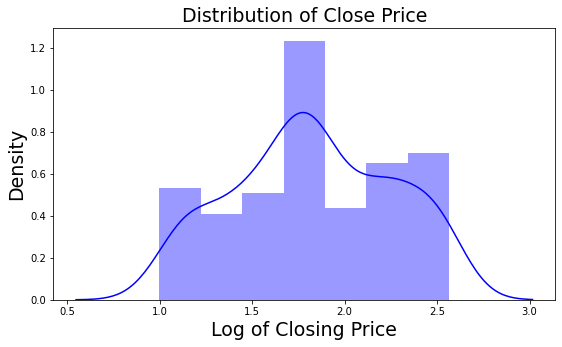

In [ ]:
#distribution plot of Close price by applying log transformation
plt.figure(figsize=(9,5))
sns.distplot(np.log10(df['Close']),color='blue')
plt.title('Distribution of Close Price', fontsize=19)
plt.xlabel('Log of Closing Price', fontsize=19)
plt.ylabel('Density', fontsize=19)
plt.show()

--After log transformation, distribution of closing price is more normal.

##**Distribution of numerical features i.e High, Low and Open price of stock.**

<function matplotlib.pyplot.show(*args, **kw)>

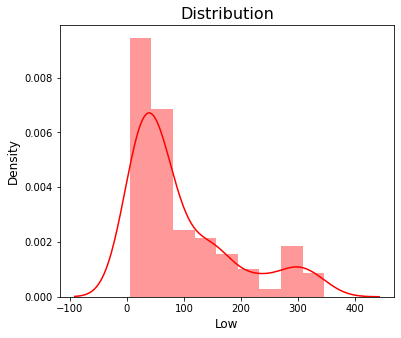

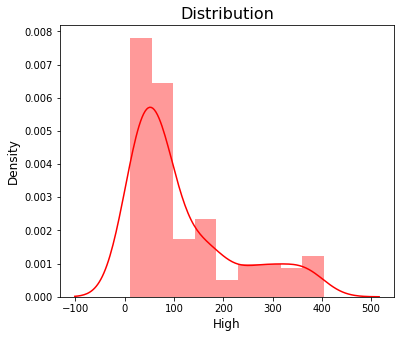

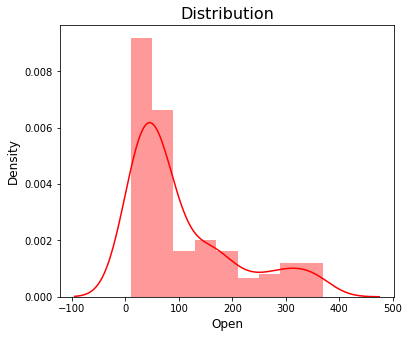

In [ ]:
#Plotting distribution for each of numerical features.
for col in numerical_features:
    plt.figure(figsize=(6,5))
    sns.distplot(df[col], color='Red')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show

--All numerical features distribution are right skewed.


--Apply log transformation to make them normally distributed.

<function matplotlib.pyplot.show(*args, **kw)>

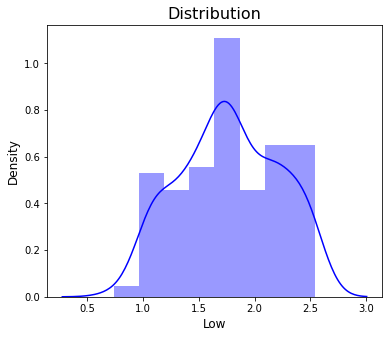

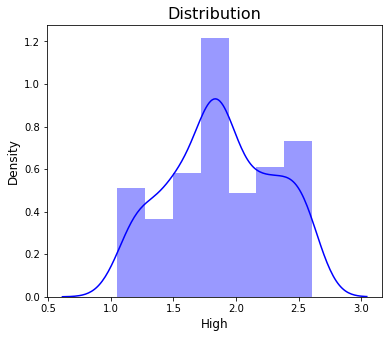

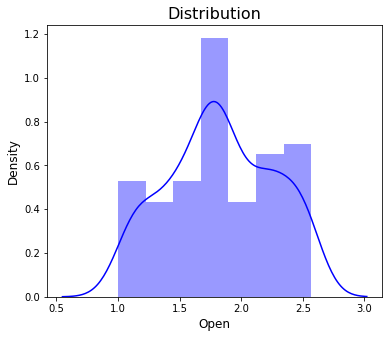

In [ ]:
#Plotting distribution for each of numerical features by applying log transformation
for col in numerical_features:
    plt.figure(figsize=(6,5))
    sns.distplot(np.log10(df[col]), color='blue')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show

--Now we have normally distributed numerical features.

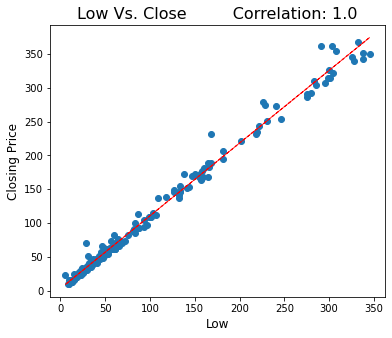

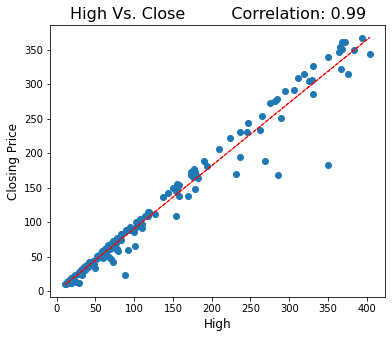

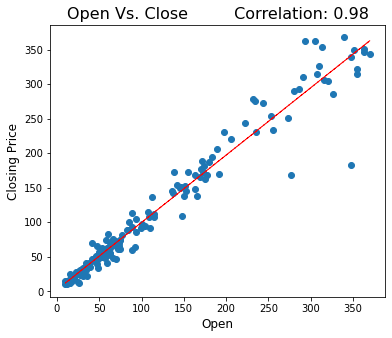

In [ ]:
for col in numerical_features:
   fig = plt.figure(figsize=(6, 5))
   ax = fig.gca()
   feature = df[col]
   label = df['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col, fontsize=12)
   plt.ylabel('Closing Price', fontsize=12)
   ax.set_title(col + ' Vs. Close' + '         Correlation: ' + str(round(correlation,2)), fontsize=16)
   z = np.polyfit(df[col], df['Close'], 1)
   y_hat = np.poly1d(z)(df[col])
 
   plt.plot(df[col], y_hat, "r--", lw=1)

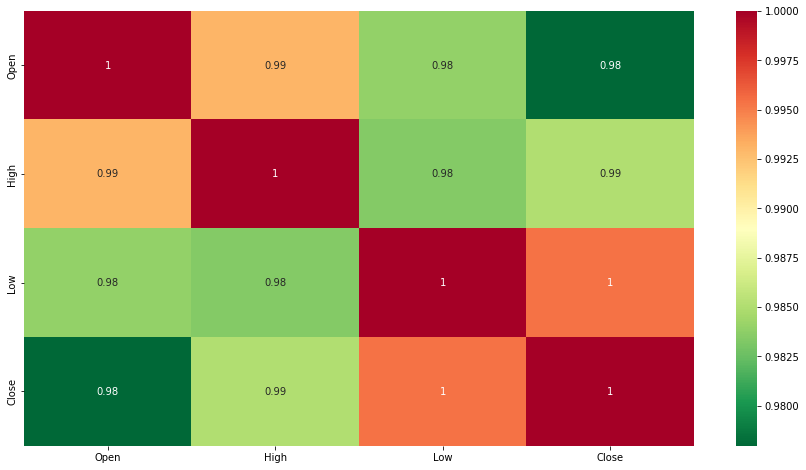

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='RdYlGn_r')

--All variables shows high correlation with each other.

# **Box Plot visualising**

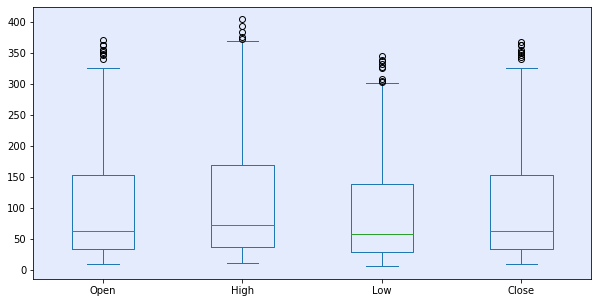

In [ ]:
df[['Open', 'High', 'Low', 'Close']].plot(kind='box',figsize=(10,5))
plt.axes().set_facecolor("#e3ebfc")
plt.show()

#**Transforming & Spliting Data**

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


X = Independant Variable values


y = Dependent Variable values

In [ ]:
# Splitting our data into Dependent and Independent Variables
X = df[['Open', 'High', 'Low']]
y = df['Close']

Data must be normal distributed. So applying narmalization on X & y.

**Rescalling updating**

In [ ]:
'''# Data transformation
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)'''

'# Data transformation\nfrom scipy.stats import zscore\nX = X.apply(zscore)\ny = np.log10(y)'

**Train(80%) & Test(20%) Split**

In [ ]:
# Spliting Data into Testing and Training Datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 1)

In [ ]:
# Resclalling data : this will rescale in between 0 and 1
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
#checking shape of training dataset.
X_train.shape

(148, 3)

In [ ]:
#checking shape of testing dataset.
X_test.shape

(37, 3)

#**1. Linear Regression**

In [ ]:
#fitting data into Linear Regression
linear_reg = LinearRegression()
linear_reg_model = linear_reg.fit(X_train,y_train)

In [ ]:
#train accuracy of linear regression model
round(linear_reg.score(X_train,y_train), 3)

0.994

In [ ]:
#test accuracy of linear regression model
round(linear_reg.score(X_test,y_test), 3)

0.998

In [ ]:
#prediction of test data.
y_pred = linear_reg.predict(X_test)

**Evaluation Metrics of Linear Regression:-**

In [ ]:
# Test Performance of linear regression model
print("MSE :",round(mean_squared_error(y_test, y_pred), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred),3))
print("R2 :",round(r2_score(y_test, y_pred), 3))

MSE : 19.989
RMSE : 4.471
MAE : 3.053
MAPE : 0.054
R2 : 0.998


**Linear Regression: Actual Vs. Predicted**

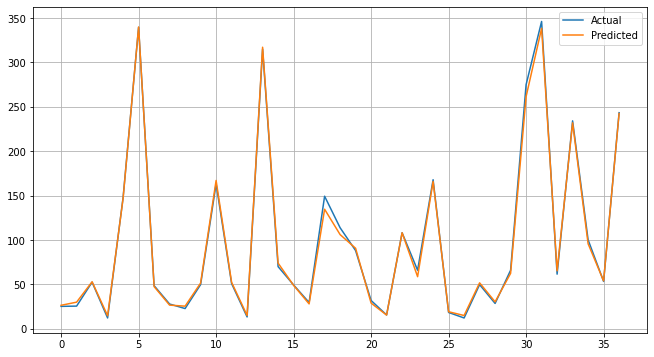

In [ ]:
# On Trainning data
plt.figure( figsize=(11,6) )
plt.plot(np.array(y_test))
plt.plot(np.array(y_pred) )
plt.grid()
plt.legend(["Actual","Predicted"])
plt.show()

#**2. Lasso Regression**

In [ ]:
#fitting data into Lasso Regression
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.005,max_iter=3000)
lasso_reg_model = lasso_reg.fit(X_train,y_train)

In [ ]:
#accuracy of lasso regression model
round(lasso_reg.score(X_train,y_train),3)

0.994

In [ ]:
#prediction of test data.
y_pred_lasso = lasso_reg.predict(X_test)

**Evaluation Metrics of Lasso Regression:-**

In [ ]:
# Test Performance of lasso regression model
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso),3))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 3))

MSE : 20.427
RMSE : 4.52
MAE : 3.091
MAPE : 0.055
R2 : 0.998


**Lasso Regression: Actual Vs. Predicted**

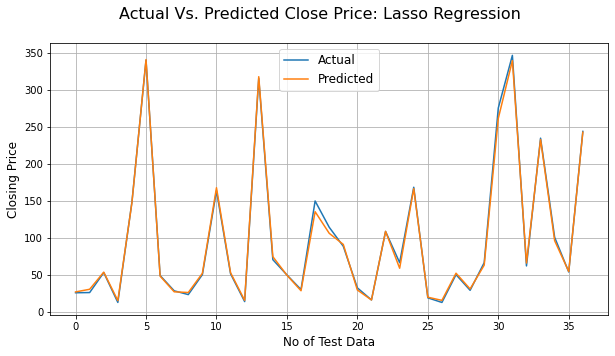

In [ ]:
# Actual Price vs. Predicted Price for Lasso Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(np.array(y_test))
plt.plot(y_pred_lasso)
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

##**Cross Validation on Lasso Regression**

In [ ]:
#importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyper-Parameter Tuning for Lasso Regression

lasso_cv = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_model_cv = GridSearchCV(lasso_cv, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)

In [ ]:
lasso_model_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,round(lasso_model_cv.best_params_['alpha'], 3))
print("The negative mean squared error for is: ", round(lasso_model_cv.best_score_,3))

The best fit alpha value is found out to be : 0.0
The negative mean squared error for is:  -59.381


In [ ]:
#prediction of test data.
y_pred_lasso_cv = lasso_model_cv.predict(X_test)

**Evaluation Metrics of Lasso Regression after Validation:-**

In [ ]:
# Test Performance of lasso regression model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso_cv), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso_cv)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso_cv),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso_cv),3))
print("R2 :",round(r2_score(y_test, y_pred_lasso_cv), 3))

MSE : 19.996
RMSE : 4.472
MAE : 3.053
MAPE : 0.054
R2 : 0.998


**Lasso Regression After Validation: Actual Vs. Predicted**

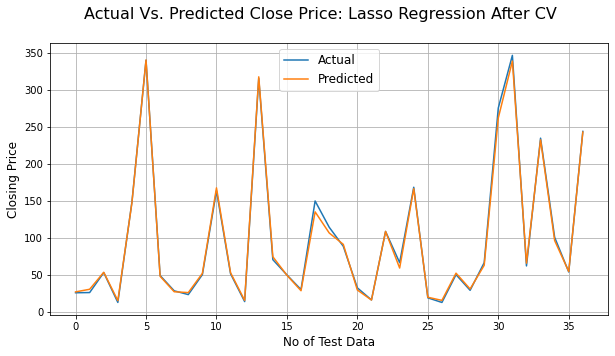

In [ ]:
# Actual Price vs. Predicted Price for Lasso Regression after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(np.array(y_test))
plt.plot(y_pred_lasso_cv)
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

#**3. Ridge Regression**

In [ ]:
#fitting data into Ridge Regression
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.01)
ridge_reg_model = ridge_reg.fit(X_train,y_train)

In [ ]:
#accuracy of lasso regression model
round(ridge_reg.score(X_train,y_train),3)

0.994

In [ ]:
#prediction of test data.
y_pred_ridge = ridge_reg.predict(X_test)

In [ ]:
# Test Performance of ridge regression model
print("MSE :",round(mean_squared_error(y_test, y_pred_ridge), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_ridge)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_ridge),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_ridge),3))
print("R2 :",round(r2_score(y_test, y_pred_ridge), 3))

MSE : 21.201
RMSE : 4.605
MAE : 3.131
MAPE : 0.056
R2 : 0.998


**Ridge Regression: Actual Vs. Predicted**

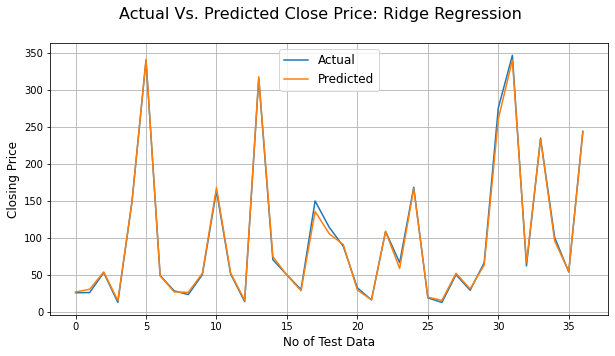

In [ ]:
# Actual Price vs. Predicted Price for Ridge Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(np.array(y_test))
plt.plot(y_pred_ridge)
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

##**Cross Validation on Ridge Regression**

In [ ]:
# Hyper-Parameter Tuning for Lasso Regression

ridge_cv = Ridge()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_model_cv = GridSearchCV(ridge_cv, parameters,scoring = 'neg_mean_squared_error',cv = 3)

In [ ]:
ridge_model_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_model_cv.best_params_['alpha'])
print("The negative mean squared error for is: ", round(ridge_model_cv.best_score_,3))

The best fit alpha value is found out to be : 0.001
The negative mean squared error for is:  -59.334


In [ ]:
#prediction of test data.
y_pred_ridge_cv = ridge_model_cv.predict(X_test)

**Evaluation Metrics of Ridge Regression after Validation:-**

In [ ]:
# Test Performance of ridge regression model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_ridge_cv), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_ridge_cv)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_ridge_cv),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_ridge_cv),3))
print("R2 :",round(r2_score(y_test, y_pred_ridge_cv), 3))

MSE : 20.095
RMSE : 4.483
MAE : 3.061
MAPE : 0.054
R2 : 0.998


**Ridge Regression After Validation: Actual Vs. Predicted**

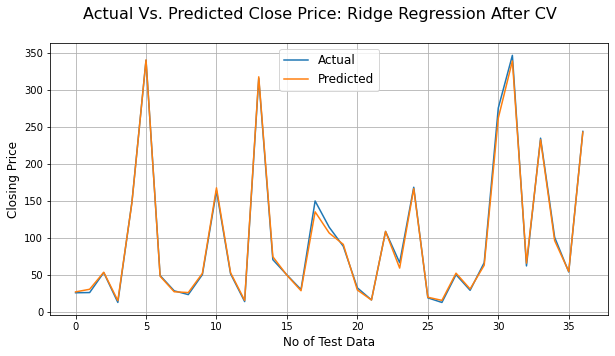

In [ ]:
# Actual Price vs. Predicted Price for Ridge Regression after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(np.array(y_test))
plt.plot(y_pred_ridge_cv)
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

#**4. Elastic Net**

In [ ]:
#fitting data into Elastic Net
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_model = elastic.fit(X_train,y_train)

In [ ]:
#accuracy of lasso regression model
round(elastic.score(X_train,y_train),3)

0.945

In [ ]:
#prediction of test data.
y_pred_elastic = elastic.predict(X_test)

In [ ]:
# Test Performance of Elastic Net model
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic),3))
print("R2 :",round(r2_score(y_test, y_pred_elastic), 3))

MSE : 436.358
RMSE : 20.889
MAE : 16.786
MAPE : 0.382
R2 : 0.953


**Elastic Net: Actual Vs. Predicted**

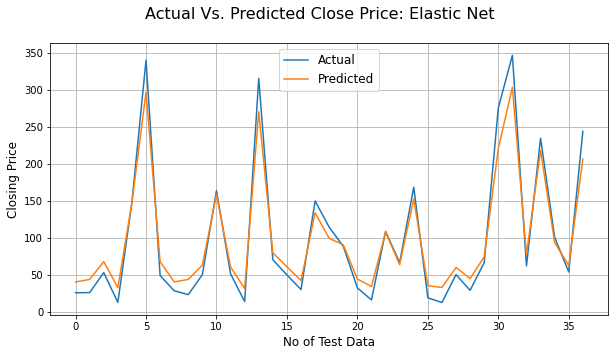

In [ ]:
# Actual Price vs. Predicted Price for Elastic Net Plotting
plt.figure(figsize=(10,5))
plt.plot(np.array(y_test))
plt.plot(y_pred_elastic)
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

# **Decision Tree**

In [ ]:
# Decision Tree Regressor model training without any parameter
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Decision tree regressor accuracy in trainning data
tree_regressor.score(X_train, y_train)

1.0

In [ ]:
# Decision tree regressor accuracy in testing data
tree_regressor.score(X_test, y_test)

0.9930629594424635

In [ ]:
dec_tree_train = tree_regressor.predict(X_train)

In [ ]:
dec_tree_test = tree_regressor.predict(X_test)

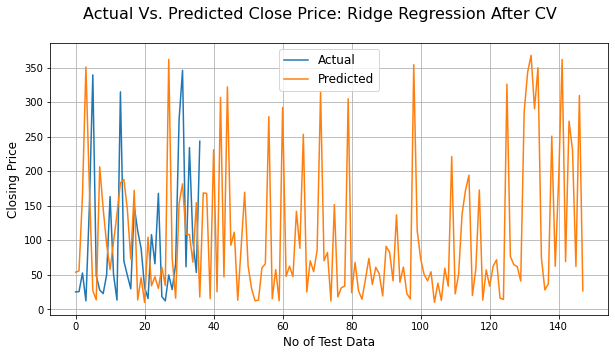

In [ ]:
# Actual Price vs. Predicted Price for Ridge Regression after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(np.array(y_test))
plt.plot(dec_tree_test)
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

##**Cross Validation on Elastic Net**

In [ ]:
# Hyper-Parameter Tuning for Elastic Net

elastic_cv = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model_cv = GridSearchCV(elastic_cv,parameters,scoring='neg_mean_squared_error',cv=3)


In [ ]:
elastic_model_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [ ]:
elastic_model_cv.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.3}

In [ ]:
print("The best fit alpha and L1 ratio value is found out to be :" ,elastic_model_cv.best_params_['alpha'], elastic_model_cv.best_params_['l1_ratio'])
print("The negative mean squared error for is: ", round(elastic_model_cv.best_score_,3))

The best fit alpha and L1 ratio value is found out to be : 1e-05 0.3
The negative mean squared error for is:  -59.333


In [ ]:
#prediction of test and train data.
y_pred_elastic_cv = elastic_model_cv.predict(X_test)

**Evaluation Metrics of Elastic Net after Validation:-**

In [ ]:
# Test Performance of Elastic Net model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic_cv), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic_cv)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic_cv),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic_cv),3))
print("R2 :",round(r2_score(y_test, y_pred_elastic_cv), 3))

MSE : 20.099
RMSE : 4.483
MAE : 3.061
MAPE : 0.054
R2 : 0.998


**Elastic Net After Validation: Actual Vs. Predicted**

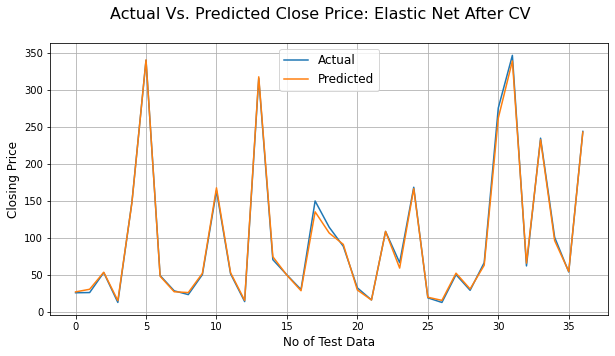

In [ ]:
# Actual Price vs. Predicted Price for Elastic Net after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(np.array(y_test))
plt.plot(y_pred_elastic_cv)
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

In [ ]:
# Decision Tree Regressor model
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Decision tree regressor accuracy in testing data
tree_regressor.score(X_test, y_test)

0.9948556994181038

###<b>Hyperparameter tuning</b>

In [ ]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": list(np.arange(1,50,3)),
              "max_depth": list(np.arange(1,10)),
              "min_samples_leaf": list(np.arange(1,10)),
              "max_leaf_nodes": list(np.arange(1,8)),
              }

In [ ]:
# Hyperparameter tuning for Decision Tree Regressor using GridseachCV
dtr = DecisionTreeRegressor()
tree_grid = GridSearchCV(dtr, param_grid, cv=5)

tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [1, 4, 7, 10, 13, 16, 19, 22, 25,
                                               28, 31, 34, 37, 40, 43, 46,
                                               49]})

In [ ]:
# hyperparameter tuning best parameters
tree_grid.best_params_

{'criterion': 'mse',
 'max_depth': 3,
 'max_leaf_nodes': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 4}

In [ ]:
# Check accuracy score with GridSearchCV
tree_grid.score(X_train, y_train)

0.9823691969565722

###<b>Decision Tree Regressor </b>

In [ ]:
# Decison Tree Regressor model trainning on best parameters got from GridsearchCV hyperparameter tuning.
tree_regressor_best = DecisionTreeRegressor(criterion = 'mse', max_depth = 6, max_leaf_nodes=7, min_samples_leaf = 5, min_samples_split=7) 
tree_regressor_best.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_leaf_nodes=7,
                      min_samples_leaf=5, min_samples_split=7)

In [ ]:
# Trainning Score on Decision Tree Regressor with best parameters
tree_regressor_best.score(X_train, y_train)

0.9823691969565722

In [ ]:
# Testing Score on Decision Tree Regressor with best parameters
tree_regressor_best.score(X_test, y_test)

0.9686705459522194

##<b>Random Forest Regressor <b>

In [ ]:
# Do trainning on random forest regressor without any parameter
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:

# Accuracy score of random forest regressor without any parameter 
random_forest.score(X_train, y_train)

0.9979623765102693

###<b>Hyperparameter tuning with GridSearchCV for Random Forest Regressor</b>

In [ ]:
# Hyperparameter tuning for Random Forest Regressor
random_forest = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : np.arange(50,100),
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : np.arange(1,6),
            "bootstrap": [True, False]
            }
# random_forest_gridsearch = GridSearchCV(estimator = dtr, param_grid = grid_values, scoring = 'roc_auc', cv=5)
random_forest_gridsearch = GridSearchCV(random_forest, param_grid, n_jobs=-1, cv=5)
random_forest_gridsearch.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [ ]:
# GridSearchCV hyperparameter tuning for Random Forest Regressor
random_forest_gridsearch.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 94}

In [ ]:
# Random forest Regressor model trainning on best parameters got from GridsearchCV hyperparameter tuning.
random_forest_best = RandomForestRegressor(bootstrap = 'True', max_features='auto', max_leaf_nodes=5, min_samples_leaf = 2, n_estimators=54) 
random_forest_best.fit(X_train, y_train)

RandomForestRegressor(bootstrap='True', max_leaf_nodes=5, min_samples_leaf=2,
                      n_estimators=54)

In [ ]:
# Trainning Score on Decision Tree Regressor with best parameters
random_forest_best.score(X_train, y_train)

0.9830709741914139

In [ ]:
# Testing Score on Decision Tree Regressor with best parameters
random_forest_best.score(X_test, y_test)

0.9886008944020366

#**Evaluation Matrics Comparison:-**





In [ ]:
def compare_model(X_train, X_test, y_train, y_test, models):
  df_columns = []
  #Creating dataframe to store the train and test metrics for each of the models
  df=pd.DataFrame(columns=df_columns)

  i = 0
  #need to pass each model one by one
  for model in models:
    #fiting each model training dataset
    model.fit(X_train, y_train)
    #predicting y values for each model
    y_pred = model.predict(X_test)
    #getting accuracy score for each model
    accuracy = model.score(X_test, y_test)

    #getting all evaluation matrics for each model
    MSE = round(mean_squared_error(y_test, y_pred), 3)
    RMSE = round(math.sqrt(mean_squared_error(y_test, y_pred)),3)
    MAE = round(mean_absolute_error(y_test, y_pred),3)
    MAPE = round(mean_absolute_percentage_error(y_test, y_pred),3)
    R2 = round(r2_score(y_test, y_pred), 3)

    #getting all above into dataframe
    df.loc[i,"Model"] = model.__class__.__name__
    df.loc[i, "MSE"] = MSE
    df.loc[i, "RMSE"] = RMSE
    df.loc[i, "MAE"] = MAE
    df.loc[i, "MAPE"] = MAPE
    df.loc[i, "R2"] = R2

    #to get values in next rows for next model
    i=i+1

  #Sorting values by accuracy
  df.sort_values(by=['R2'],ascending=False,inplace=True, ignore_index=True)
    
  return df

In [ ]:
all_model = [linear_reg, lasso_reg, ridge_reg, elastic]

In [ ]:
#Evaluation Matrics Comparison
matrics_compare_df = compare_model(X_train, X_test, y_train, y_test, all_model)
matrics_compare_df

,Model,MSE,RMSE,MAE,MAPE,R2
0,LinearRegression,19.989,4.471,3.053,0.054,0.998
1,Lasso,20.427,4.520,3.091,0.055,0.998
2,Ridge,21.201,4.605,3.131,0.056,0.998
3,ElasticNet,436.358,20.889,16.786,0.382,0.953


# **implementing from XGBRegressor**

In [ ]:
#initialize and fit GradientBoosting regressor
xgb_regressor=XGBRegressor()
xgb_regressor.fit(X_train,y_train)

[16:34:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_pred_train=xgb_regressor.predict(X_train)
y_pred_test=xgb_regressor.predict(X_test)

In [ ]:
# Get the roc_auc score for train and test dataset
r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)

In [ ]:
#randomforest regressor of value of MAE,MSE,RMSE,r2_score
MAE =  mean_absolute_error((y_test), (y_pred_test))
print("MAE :",MAE)

MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

print("r2_score_train :",r2_score_train)

print("r2_score_test :",r2_score_test)

MAE : 4.296455351339803
MSE : 33.318703967055924
RMSE : 5.7722356125729934
r2_score_train : 0.9994938413318265
r2_score_test : 0.9964016143272789


In [ ]:
#Define all models 
model=[
    ['LinearRegression:',linear_reg_model],
    ['Lasso:',lasso_model_cv],
    ['Ridge:',ridge_model_cv],
    ['ElasticNetCV:',elastic_model_cv],
    ['DecisionTreeRegression:',tree_regressor_best],
    ['RandomForestRegressor:',random_forest],
    ['GradientBoosting Regressor:',random_forest_gridsearch],
    ['XGB regressor :',xgb_regressor]
    
]

In [ ]:
model

[['LinearRegression:', LinearRegression()],
 ['Lasso:', GridSearchCV(cv=3, estimator=Lasso(),
               param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                     0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                     50, 55, 60, 100]},
               return_train_score=True, scoring='neg_mean_squared_error')],
 ['Ridge:', GridSearchCV(cv=3, estimator=Ridge(),
               param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                     0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                     50, 55, 60, 100]},
               scoring='neg_mean_squared_error')],
 ['ElasticNetCV:', GridSearchCV(cv=3, estimator=ElasticNet(),
               param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                     0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                     50, 55, 60, 100],
                 

In [ ]:
model_data=[]
for name,current_model in model:
  curr_model_data={}
  current_model.random_state=1
  curr_model_data['Name']=name
  if(name!='LinearRegression: '):
    current_model.fit(X_train,y_train)
    curr_model_data['MAE']=mean_absolute_error(y_test,current_model.predict(X_test))
    curr_model_data['MSE']=mean_squared_error(y_test,current_model.predict (X_test))
    curr_model_data['RMSE']=np.sqrt(mean_squared_error(y_test, current_model.predict(X_test)))
    curr_model_data['R2_score_train']=r2_score(y_train,current_model.predict (X_train))
    curr_model_data['R2_score_test']=r2_score(y_test,current_model.predict (X_test))
    model_data.append(curr_model_data)

[16:41:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# create dataframe with evaluation metrics
table_df=pd.DataFrame(model_data)
table_df

,Name,MAE,MSE,RMSE,R2_score_train,R2_score_test
0,LinearRegression:,3.052765,19.988579,4.470859,0.994395,0.997841
1,Lasso:,3.053483,19.996124,4.471703,0.994395,0.997840
2,Ridge:,3.061022,20.095425,4.482792,0.994394,0.997830
3,ElasticNetCV:,3.061280,20.099160,4.483209,0.994394,0.997829
4,DecisionTreeRegression:,11.860779,290.090307,17.032038,0.982369,0.968671
5,RandomForestRegressor:,4.185854,35.150534,5.928789,0.998133,0.996204
6,GradientBoosting Regressor:,4.197417,35.394502,5.949328,0.998162,0.996177
7,XGB regressor :,4.296455,33.318704,5.772236,0.999494,0.996402


#**Conclusions:**


1. We got a maximum accuracy of 99%.

2. Linear, lasso and ridge regression show almost same R squared values.


3. Whereas elastic net model shows lowest R squared value and high MSE, RMSE, MAE & MAPE.

4. Close, Open and high price of stock are strongly correlated with each other.
5. Regression models namely random forest regressor, xgboost regressor are build.
